In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# load data
df = pd.read_csv('./data/kidney_disease.csv')
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [3]:
# change strings to digits
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'target'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0)
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [4]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
# check NaN/null values
df.isnull().sum()

age         9
bp         12
sg         47
al         46
su         49
rbc       152
pc         65
pcc         4
ba          4
bgr        44
bu         19
sc         17
sod        87
pot        88
hemo       52
pcv        70
wc        105
rc        130
htn         2
dm          2
cad         2
appet       1
pe          1
ane         1
target      0
dtype: int64

In [6]:
# data cleaning, drop NaN
df2 = df.dropna(axis=0)

In [7]:
df2.shape
# seems we have many NaN values

(158, 25)

In [8]:
df2.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,target
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,0.113924,0.183544,0.088608,0.075949,131.341772,...,138.848101,4.636709,13.687342,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,64.939832,...,7.489421,3.476351,2.882204,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,111.000000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,...,135.000000,3.700000,12.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.500000,...,139.000000,4.500000,14.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.750000,...,144.000000,4.900000,15.775000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,150.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# change feature types
df2[['wc','pcv','rc']] = df2[['wc','pcv','rc']].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
age       158 non-null float64
bp        158 non-null float64
sg        158 non-null float64
al        158 non-null float64
su        158 non-null float64
rbc       158 non-null float64
pc        158 non-null float64
pcc       158 non-null float64
ba        158 non-null float64
bgr       158 non-null float64
bu        158 non-null float64
sc        158 non-null float64
sod       158 non-null float64
pot       158 non-null float64
hemo      158 non-null float64
pcv       158 non-null float64
wc        158 non-null float64
rc        158 non-null float64
htn       158 non-null float64
dm        158 non-null float64
cad       158 non-null float64
appet     158 non-null float64
pe        158 non-null float64
ane       158 non-null float64
target    158 non-null float64
dtypes: float64(25)
memory usage: 32.1 KB


/Users/srx/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
# data cleaning, first correct some incorrect data
df2['wc'] = df2['wc'].replace(to_replace="\t6200",value=6200)
df2['wc'] = df2['wc'].replace(to_replace="\t8400",value=8400)

/Users/srx/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/srx/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


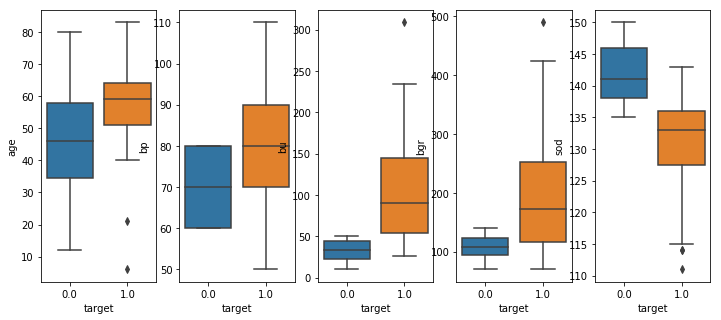

In [12]:
# check outliers
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 5, 1)
sns.boxplot(x= df2["target"], y=df2["age"], data=df2)
ax2 = fig.add_subplot(1, 5, 2)
sns.boxplot(x= df2["target"],  y=df2["bp"], data=df2)
ax3 = fig.add_subplot(1, 5, 3)
sns.boxplot(x= df2["target"],  y=df2["bu"], data=df2)
ax4 = fig.add_subplot(1, 5, 4)
sns.boxplot( x= df2["target"], y=df2["bgr"], data=df2)
ax5 = fig.add_subplot(1, 5, 5)
sns.boxplot( x= df2["target"], y=df2["sod"], data=df2)
plt.show()

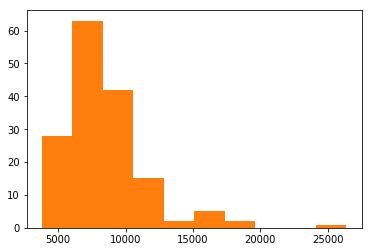

In [14]:
plt.hist(df2.wc)
plt.show()

In [15]:
# delete some possible outliers
df2 = df2[df2['wc']<=20000]

In [17]:
df2.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [18]:
# make index series continues
df2.index=range(0,len(df2),1)
df2.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
0,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [21]:
df2['target'].value_counts()

0.0    115
1.0     42
Name: target, dtype: int64

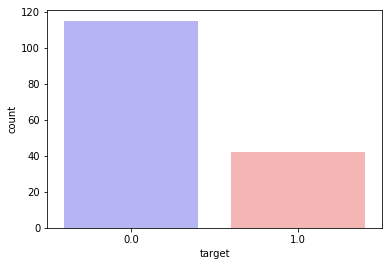

In [22]:
# check target value counts
sns.countplot(x="target", data=df2, palette="bwr")
plt.show()

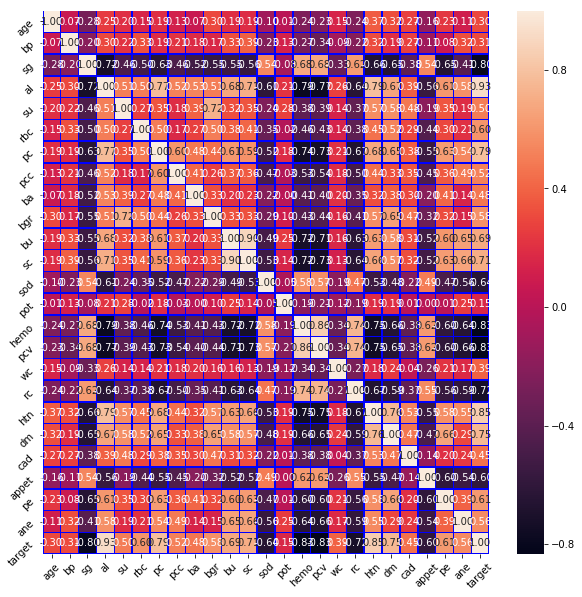

In [23]:
#correlation of features
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="blue")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [25]:
# Split the dataset into training and testing set
x_data = df2.drop(['target'], axis = 1)
y = df2['target']
# Normalize
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True, random_state=5)

In [26]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print("Linear Regression - Test Accuracy: {:.2f}%".format(linear_regression.score(X_test,y_test)*100))

Linear Regression - Test Accuracy: 86.89%


In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
print("Logistic Regression - Test Accuracy: {:.2f}%".format(logistic_regression.score(X_test,y_test)*100))


Logistic Regression - Test Accuracy: 96.88%


In [28]:
# SVM
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print("SVM - Test Accuracy: {:.2f}%".format(svm.score(X_test,y_test)*100))


SVM - Test Accuracy: 96.88%


In [29]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
print("Naive Bayes - Test Accuracy: {:.2f}%".format(naive_bayes.score(X_test,y_test)*100))


Naive Bayes - Test Accuracy: 100.00%


In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
print("Decision Tree - Test Accuracy: {:.2f}%".format(decision_tree.score(X_test, y_test)*100))


Decision Tree - Test Accuracy: 100.00%


In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("KNN (with k = 5) - Test Accuracy: {:.2f}%".format( knn.score(X_test, y_test)*100))


KNN (with k = 5) - Test Accuracy: 93.75%


In [32]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train,y_train)
print("Random Forest - Test Accuracy: {:.2f}%".format(clf.score(X_test,y_test)*100))

Random Forest - Test Accuracy: 100.00%


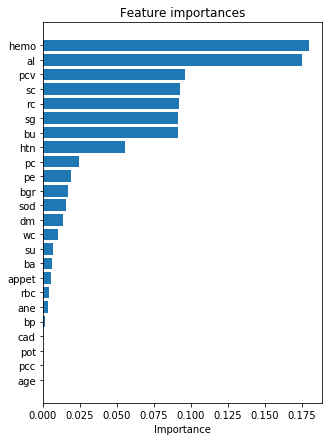

In [33]:
# plot feature importance
features_list = X_train.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5, 7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()